# Data 

## Imports 

In [64]:
import os
import pandas as pd
import numpy as np

os.chdir('/Users/ryansullivan/Downloads/')

## Merging data from 3 csvs

In [65]:
import pandas as pd

# Load the CSV files
df_ss = pd.read_csv('spreadspoke_scores.csv')
df_teams = pd.read_csv('nfl_teams.csv')
df_stads = pd.read_csv('nfl_stadiums.csv', encoding='ISO-8859-1')

df_teams = df_teams.rename(columns={'team_name':'team_home'})
merged_df = pd.merge(df_teams, df_ss, on='team_home', how='inner')# Print the column names of both DataFrames

df_stads = df_stads.rename(columns={'stadium_name': 'stadium'})
df = pd.merge(merged_df, df_stads, on='stadium', how='inner')

## Schedule date transformed to date type, sorted df by schedule date
df['schedule_date'] = pd.to_datetime(df['schedule_date'], format='%m/%d/%Y', errors='coerce')
df = df.sort_values(by='schedule_date').reset_index(drop=True)

df['team_home'] = df['team_home'].replace({'Boston Patriots': 'New England Patriots'})
df['team_away'] = df['team_away'].replace({'Boston Patriots': 'New England Patriots'})

## This value should be numeric but is object type
df['over_under_line'] = pd.to_numeric(df['over_under_line'], errors='coerce')


df['team_away'].unique()

array(['Oakland Raiders', 'Denver Broncos', 'Buffalo Bills',
       'New York Jets', 'New England Patriots', 'Baltimore Colts',
       'Cleveland Browns', 'New York Giants', 'Minnesota Vikings',
       'Kansas City Chiefs', 'Chicago Bears', 'Philadelphia Eagles',
       'Los Angeles Rams', 'Green Bay Packers', 'Atlanta Falcons',
       'Detroit Lions', 'Washington Redskins', 'Houston Oilers',
       'Miami Dolphins', 'San Francisco 49ers', 'San Diego Chargers',
       'St. Louis Cardinals', 'Dallas Cowboys', 'Pittsburgh Steelers',
       'New Orleans Saints', 'Cincinnati Bengals', 'Tampa Bay Buccaneers',
       'Seattle Seahawks', 'Los Angeles Raiders', 'Indianapolis Colts',
       'Phoenix Cardinals', 'Arizona Cardinals', 'Carolina Panthers',
       'St. Louis Rams', 'Jacksonville Jaguars', 'Baltimore Ravens',
       'Tennessee Oilers', 'Tennessee Titans', 'Houston Texans',
       'Los Angeles Chargers', 'Las Vegas Raiders',
       'Washington Football Team', 'Washington Commanders'],

## Object Data

In [66]:
df_cat = df.select_dtypes(include=['object', 'category'])
df_cat = df_cat.fillna('Unknown')
df_cat.drop(columns=['team_name_short', 'team_id', 'team_id_pfr','stadium_address','stadium_weather_station_zipcode','stadium_weather_station_name','stadium_weather_station'], inplace=True)  ### IRRELEVANT
df_cat.dtypes


team_home                  object
team_conference            object
team_division              object
team_conference_pre2002    object
team_division_pre2002      object
schedule_week              object
team_away                  object
team_favorite_id           object
stadium                    object
weather_detail             object
stadium_location           object
stadium_type               object
stadium_weather_type       object
stadium_capacity           object
stadium_surface            object
dtype: object

## Float Data

In [67]:
df_num = df.select_dtypes(include=['float64'])
df_num[df_num.columns] = df_num.fillna(df_num.mean())
df_num.head()

score_home  score_away  spread_favorite  over_under_line  \
0        14.0        23.0        -5.372946        42.282329   
1        45.0         7.0        -5.372946        42.282329   
2        27.0         7.0        -5.372946        42.282329   
3        14.0        19.0        -5.372946        42.282329   
4        31.0         0.0        -5.372946        42.282329   

   weather_temperature  weather_wind_mph  weather_humidity  stadium_open  \
0                 83.0               6.0              71.0   1946.000000   
1                 81.0               7.0              70.0   1978.466085   
2                 70.0               7.0              82.0   1978.466085   
3                 82.0              11.0              78.0   1946.000000   
4                 77.0               6.0              82.0   1978.466085   

   stadium_close  stadium_latitude  stadium_longitude  stadium_azimuthangle  \
0    1986.000000         25.790500         -80.316300            192.485631   
1    2002.689877         38.021551         -89.763382            192.485631   
2    2002.689877         38.021551         -89.763382            192.485631   
3    1986.000000         25.790500         -80.316300            192.485631   
4    2002.689877         38.021551         -89.763382            192.485631   

   stadium_elevation  
0           8.800000  
1         187.972944  
2         187.972944  
3           8.800000  
4         187.972944

## Boolean Data

In [68]:
df_bool = df.select_dtypes(include=[bool]).astype(int)
df_bool


schedule_playoff  stadium_neutral
0                     0                0
1                     0                0
2                     0                0
3                     0                0
4                     0                0
...                 ...              ...
14067                 0                0
14068                 0                0
14069                 0                0
14070                 0                0
14071                 0                0

[14072 rows x 2 columns]

## Integer Data

In [69]:
df_int = df.select_dtypes(include=['int64'])
df_int


schedule_season
0                 1966
1                 1966
2                 1966
3                 1966
4                 1966
...                ...
14067             2024
14068             2024
14069             2024
14070             2024
14071             2024

[14072 rows x 1 columns]

## cleaned Data

In [70]:
nfl1 = pd.concat([df_cat, df_num], axis=1)
nfl2 = pd.concat([ df_int, df_bool],axis=1)
nfl = pd.concat([nfl1,nfl2],axis=1)
nfl.head()

team_home team_conference team_division team_conference_pre2002  \
0      Miami Dolphins             AFC      AFC East                     AFC   
1      Houston Oilers             AFC       Unknown                     AFC   
2  San Diego Chargers             AFC      AFC West                     AFC   
3      Miami Dolphins             AFC      AFC East                     AFC   
4      Houston Oilers             AFC       Unknown                     AFC   

  team_division_pre2002 schedule_week        team_away team_favorite_id  \
0              AFC East             1  Oakland Raiders          Unknown   
1           AFC Central             1   Denver Broncos          Unknown   
2              AFC West             1    Buffalo Bills          Unknown   
3              AFC East             2    New York Jets          Unknown   
4           AFC Central             2  Oakland Raiders          Unknown   

          stadium weather_detail  ... weather_humidity stadium_open  \
0     Orange Bowl        Unknown  ...             71.0  1946.000000   
1    Rice Stadium        Unknown  ...             70.0  1978.466085   
2  Balboa Stadium        Unknown  ...             82.0  1978.466085   
3     Orange Bowl        Unknown  ...             78.0  1946.000000   
4    Rice Stadium        Unknown  ...             82.0  1978.466085   

  stadium_close stadium_latitude stadium_longitude  stadium_azimuthangle  \
0   1986.000000        25.790500        -80.316300            192.485631   
1   2002.689877        38.021551        -89.763382            192.485631   
2   2002.689877        38.021551        -89.763382            192.485631   
3   1986.000000        25.790500        -80.316300            192.485631   
4   2002.689877        38.021551        -89.763382            192.485631   

   stadium_elevation  schedule_season  schedule_playoff  stadium_neutral  
0           8.800000             1966                 0                0  
1         187.972944             1966                 0                0  
2         187.972944             1966                 0                0  
3           8.800000             1966                 0                0  
4         187.972944             1966                 0                0  

[5 rows x 31 columns]

# Visualized Data

## Violin Plot

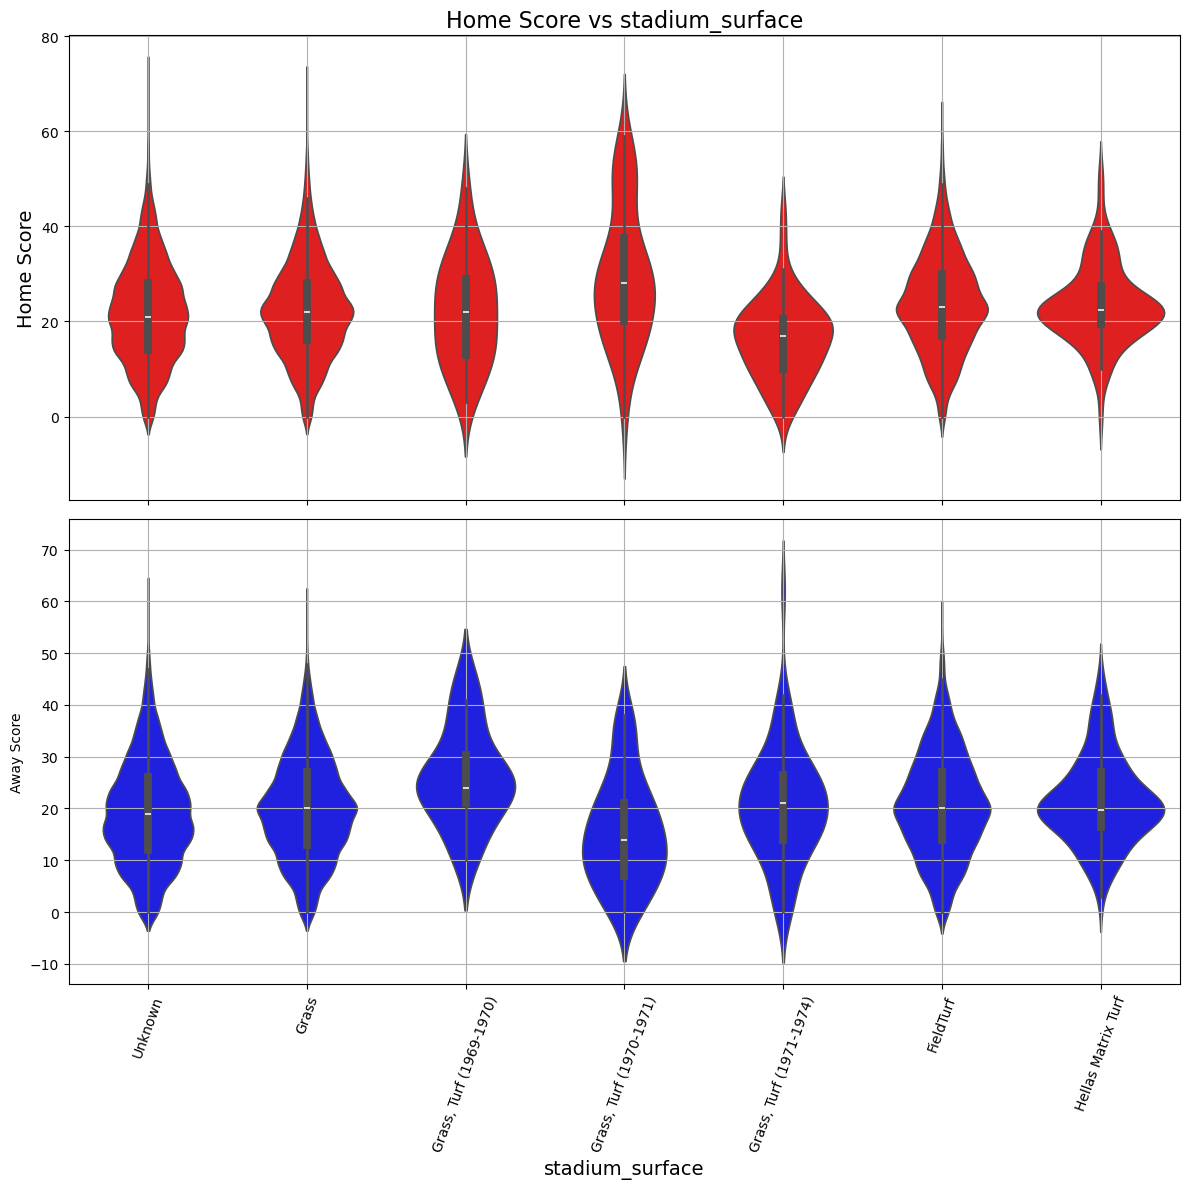

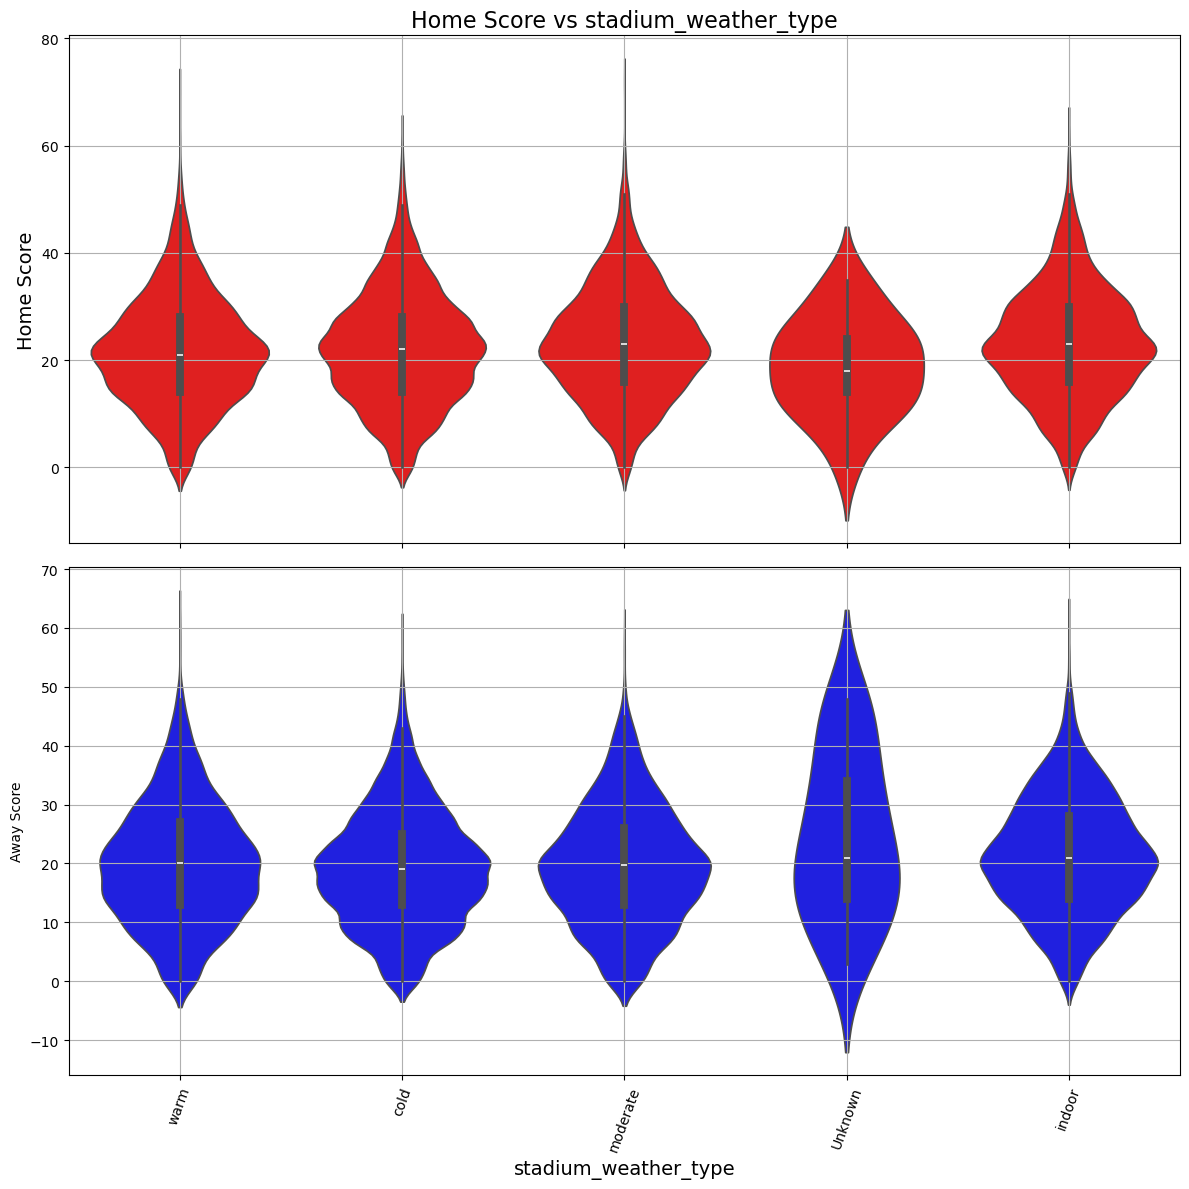

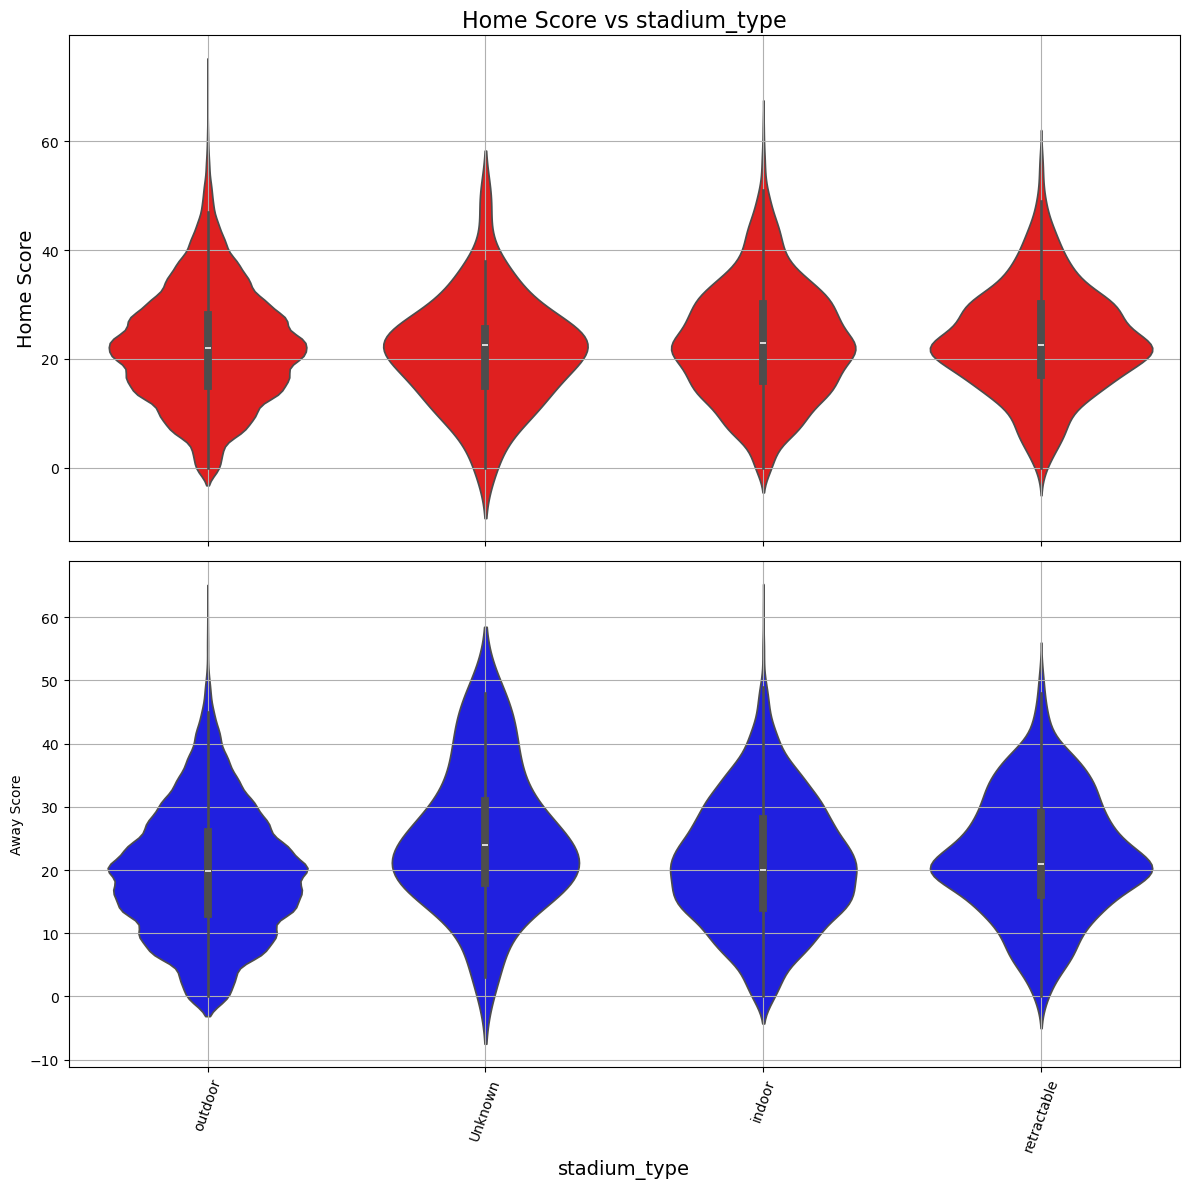

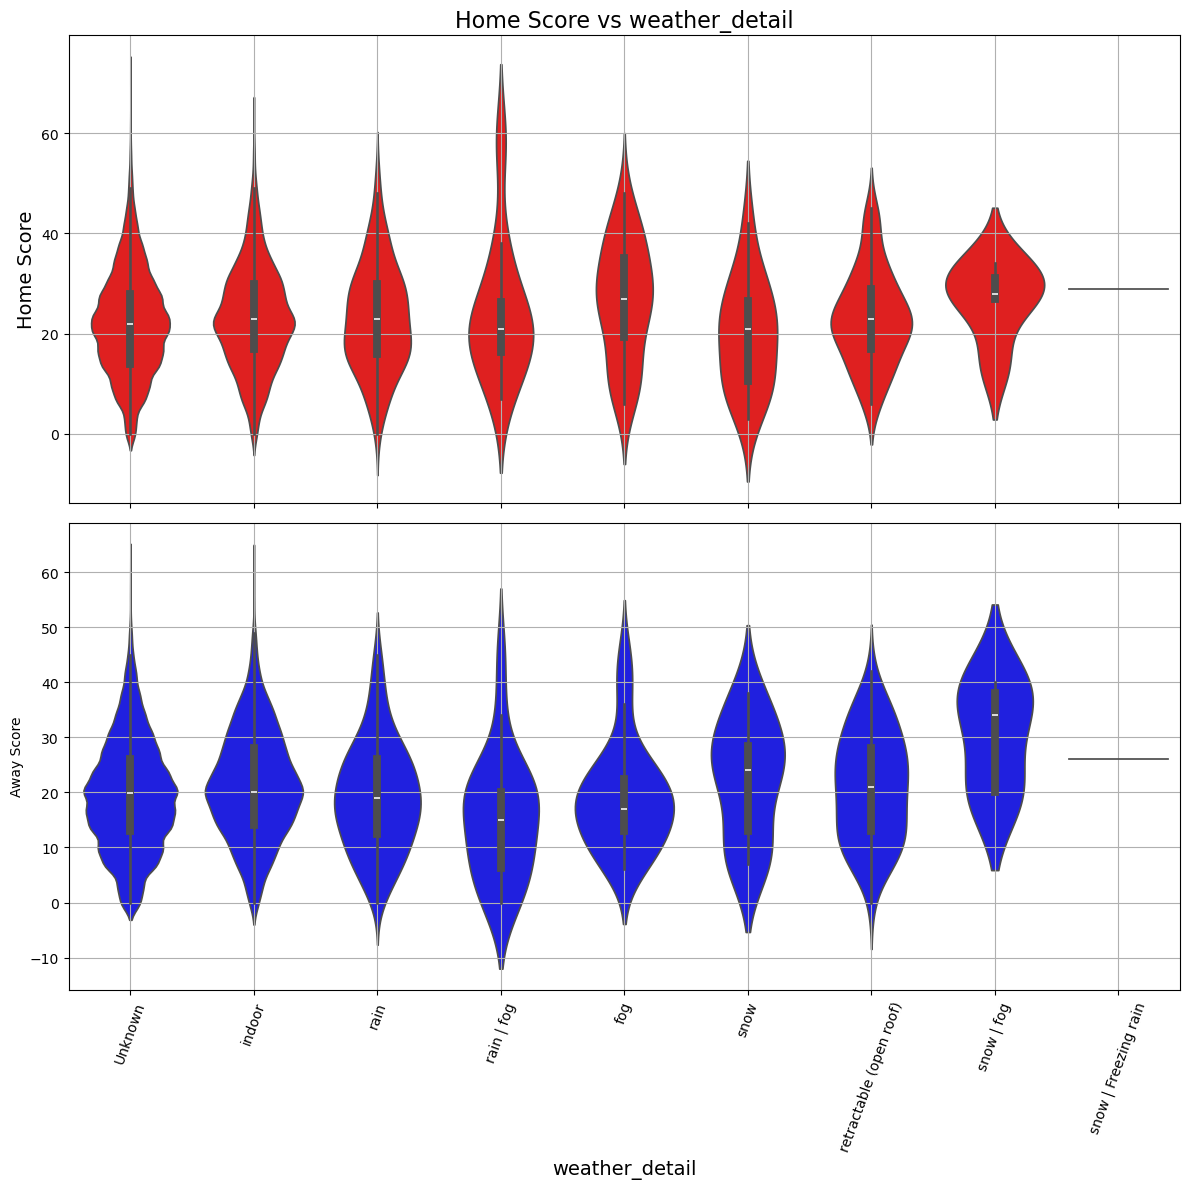

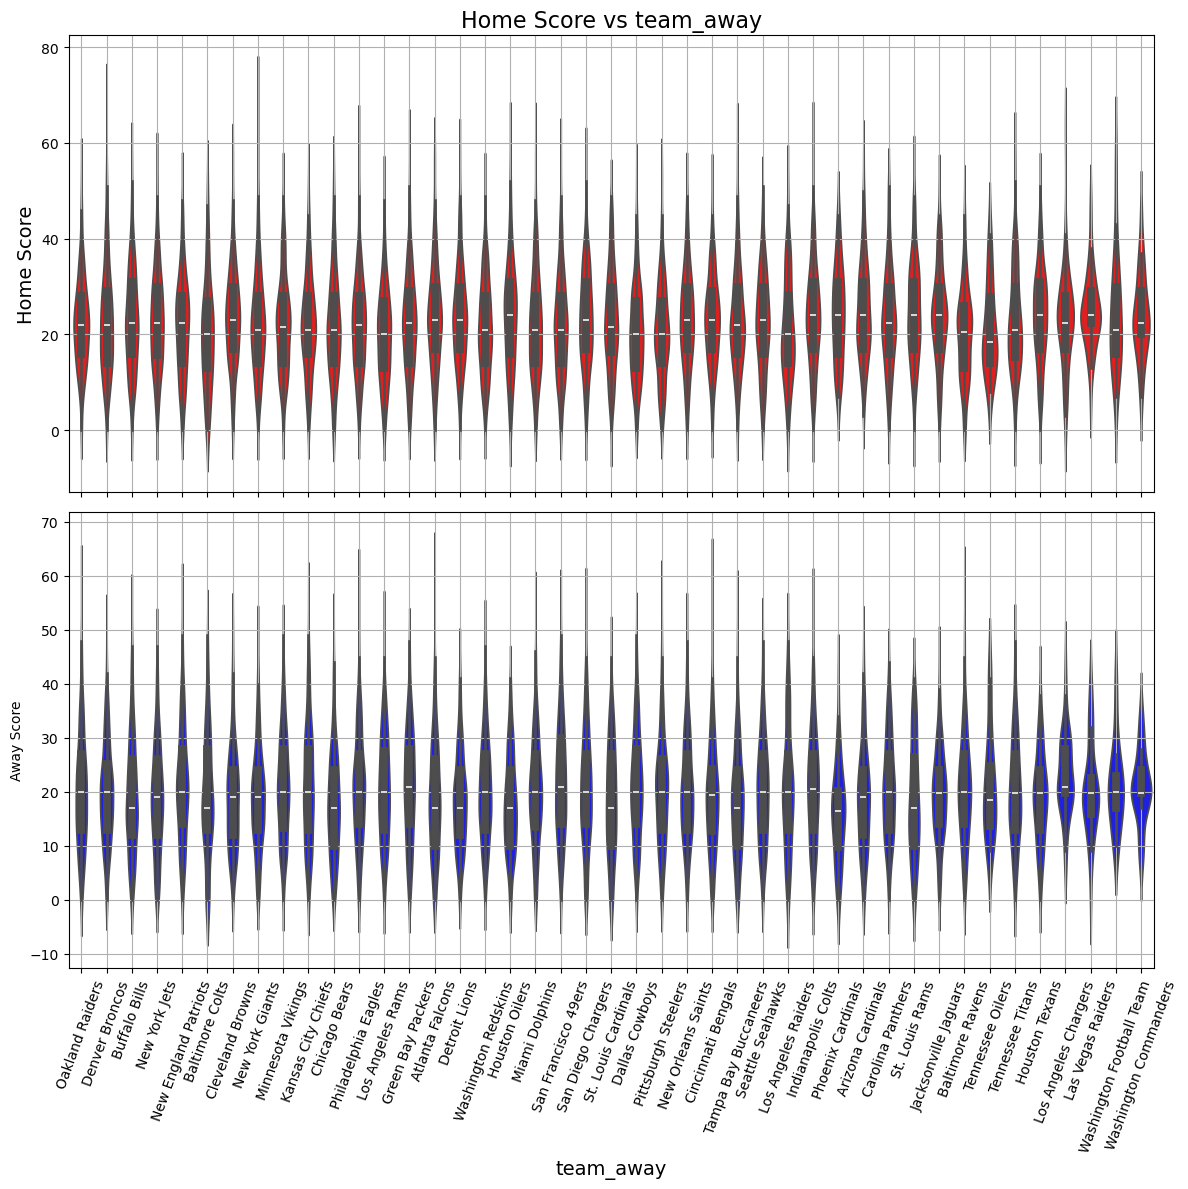

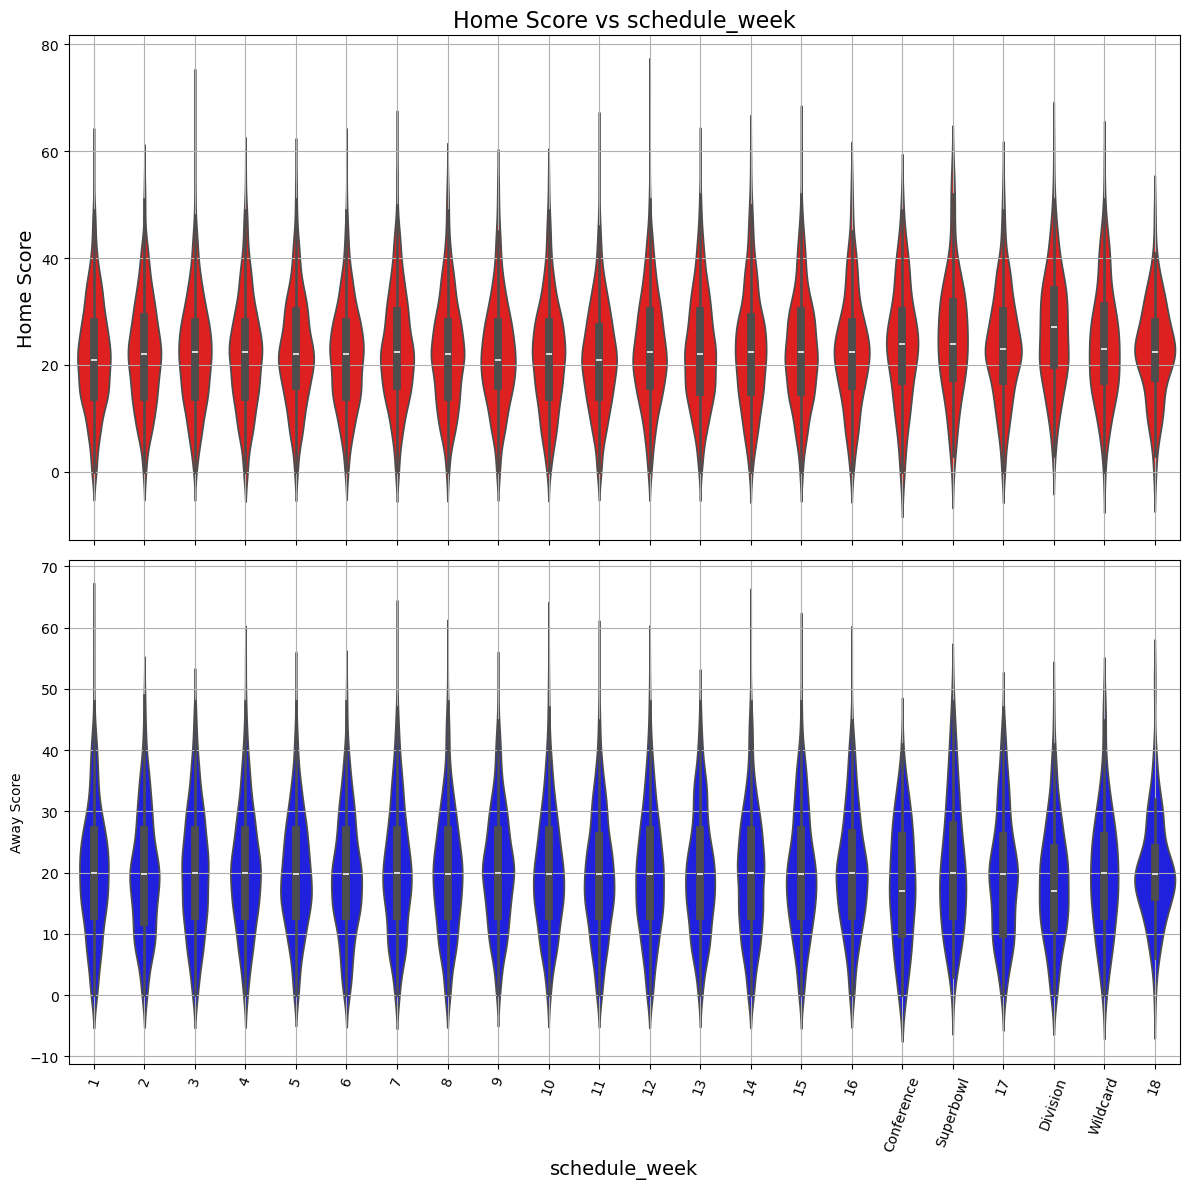

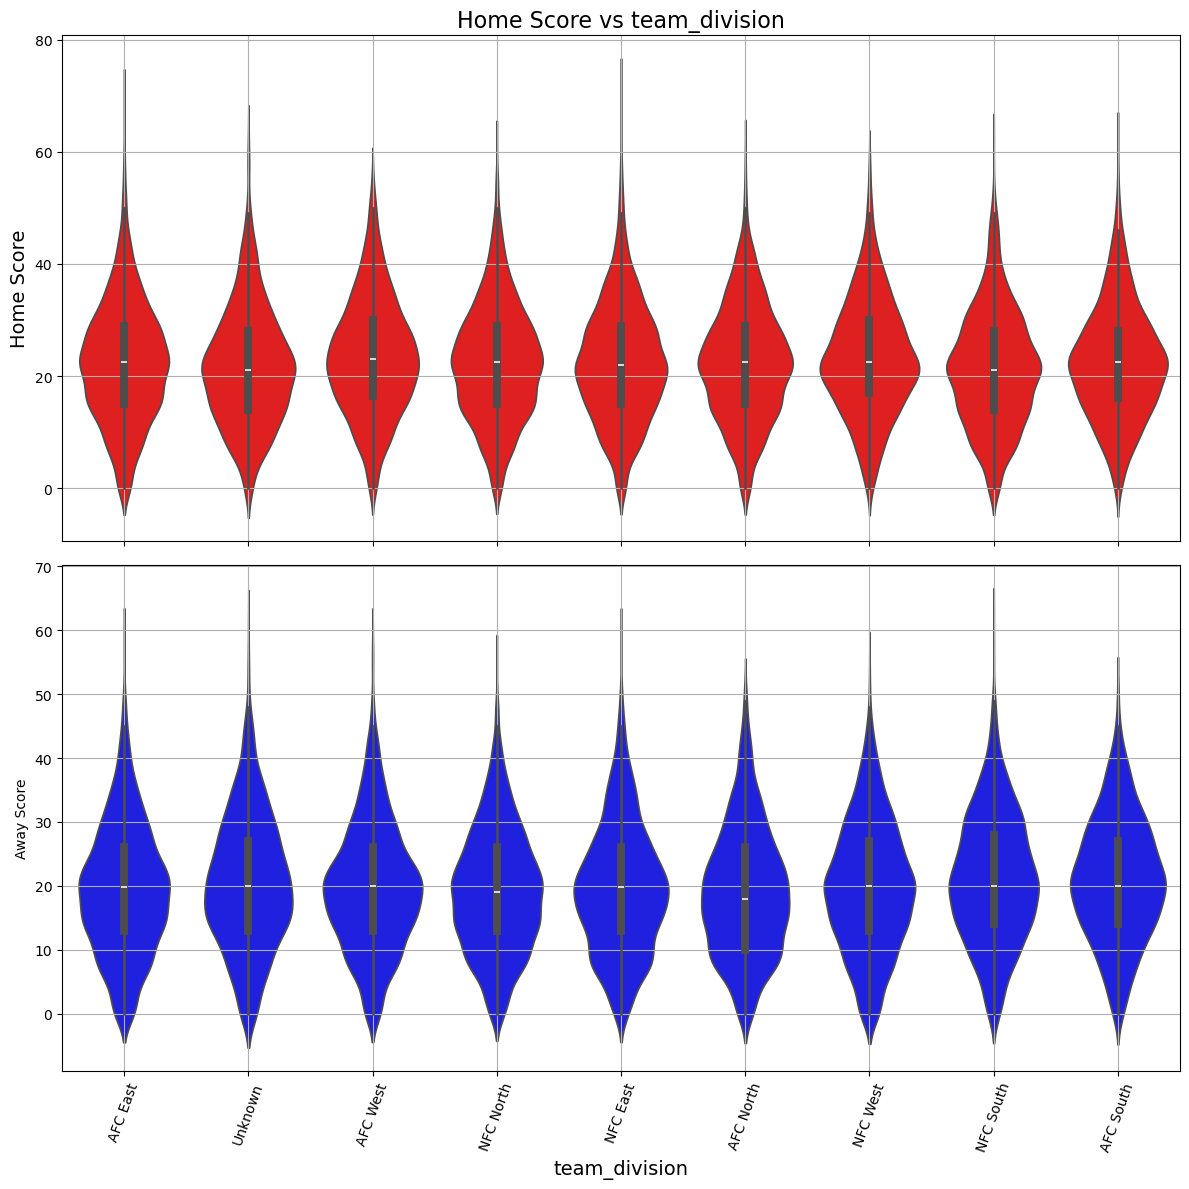

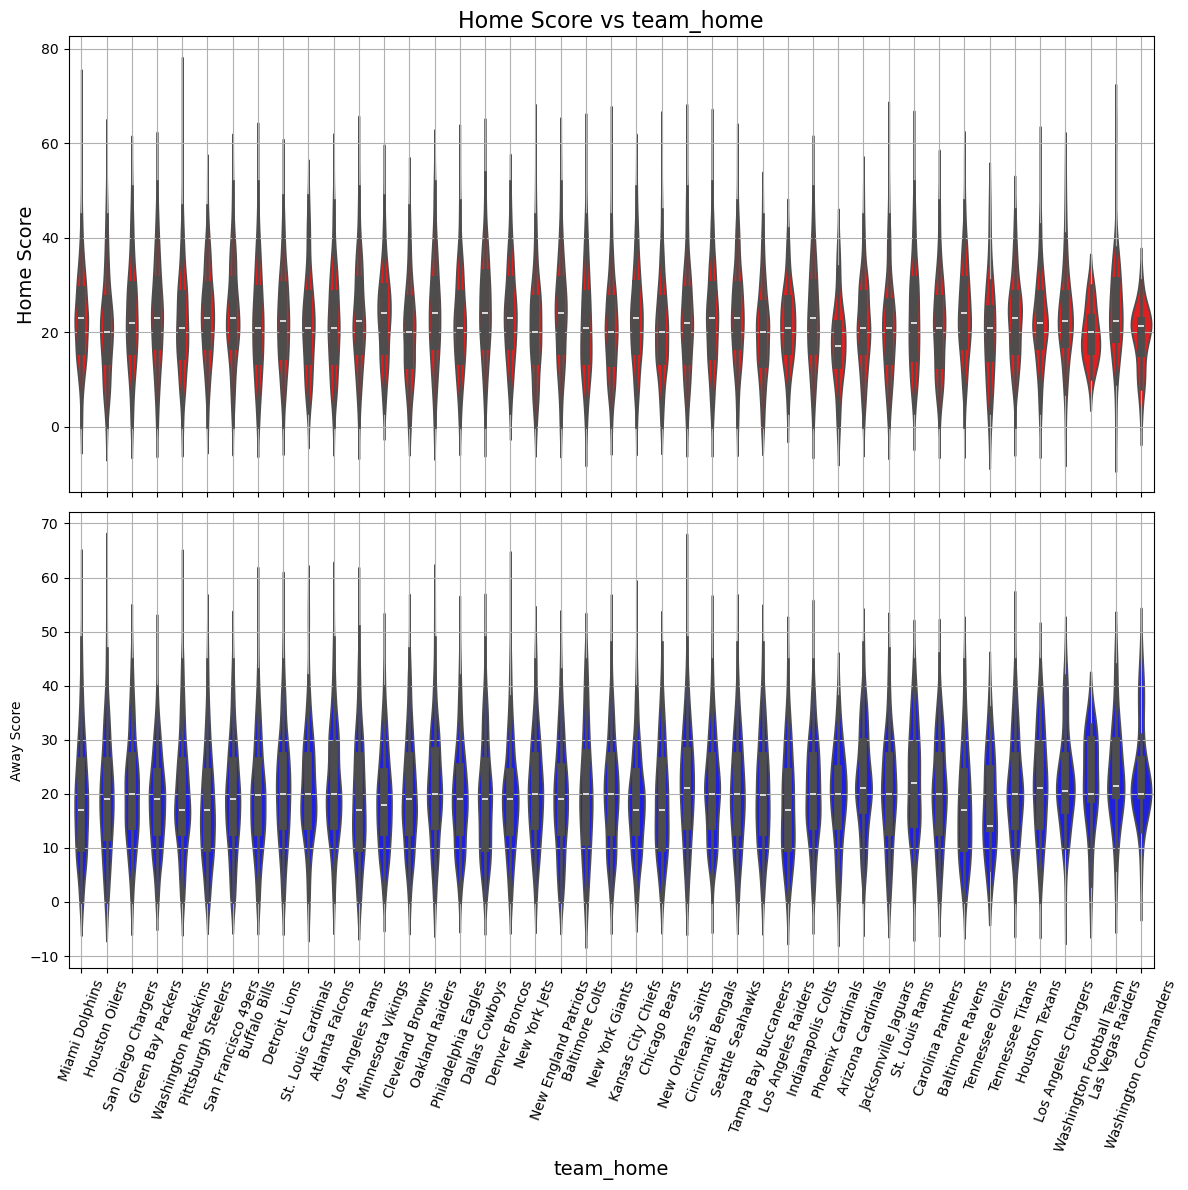

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cat['score_home'] = nfl['score_home']
df_cat['score_away'] = nfl['score_away']
# Specify the columns to keep and the order
columns_to_keep = [
    'stadium_surface', 
    'stadium_weather_type', 
    'stadium_type', 
    'weather_detail', 
    'team_away', 
    'schedule_week', 
    'team_division', 
    'team_home'
]

# Drop the column 'Snow | Freezing rain' if it exists
if 'Snow | Freezing rain' in df_cat.columns:
    df_cat = df_cat.drop(columns=['Snow | Freezing rain'])

# Add 'score_home' and 'score_away' to the columns to keep
columns_to_keep += ['score_home', 'score_away']

# Ensure columns are in the specified order
order = list(range(1, 19)) + ['Conference', 'WildCard', 'Division', 'Superbowl']
order_dict = {str(i): str(i) for i in order}
order_dict.update({
    'stadium_surface': 'stadium_surface',
    'stadium_weather_type': 'stadium_weather_type',
    'stadium_type': 'stadium_type',
    'weather_detail': 'weather_detail',
    'team_away': 'team_away',
    'schedule_week': 'schedule_week',
    'team_division': 'team_division',
    'team_home': 'team_home'
})

df_cat = df_cat[columns_to_keep]

for feature in columns_to_keep:
    if feature not in ['score_home', 'score_away']:
        plt.figure(figsize=(12, 12))
        
        ax1 = plt.subplot(2, 1, 1)
        sns.violinplot(data=df_cat, x=feature, y='score_home', ax=ax1, color='red')
        ax1.set_title(f'Home Score vs {feature}', fontsize=16)
        ax1.set_xlabel('')
        ax1.set_ylabel('Home Score', fontsize=14)
        ax1.set_xticklabels([])  # Remove x-axis tick labels
        ax1.grid(True)

        ax2 = plt.subplot(2, 1, 2)
        sns.violinplot(data=df_cat, x=feature, y='score_away', ax=ax2, color='blue')
        ax2.set_xlabel(feature, fontsize=14)
        ax2.set_ylabel('Away Score', fontsize=10)
        ax2.tick_params(axis='x', rotation=70)
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()


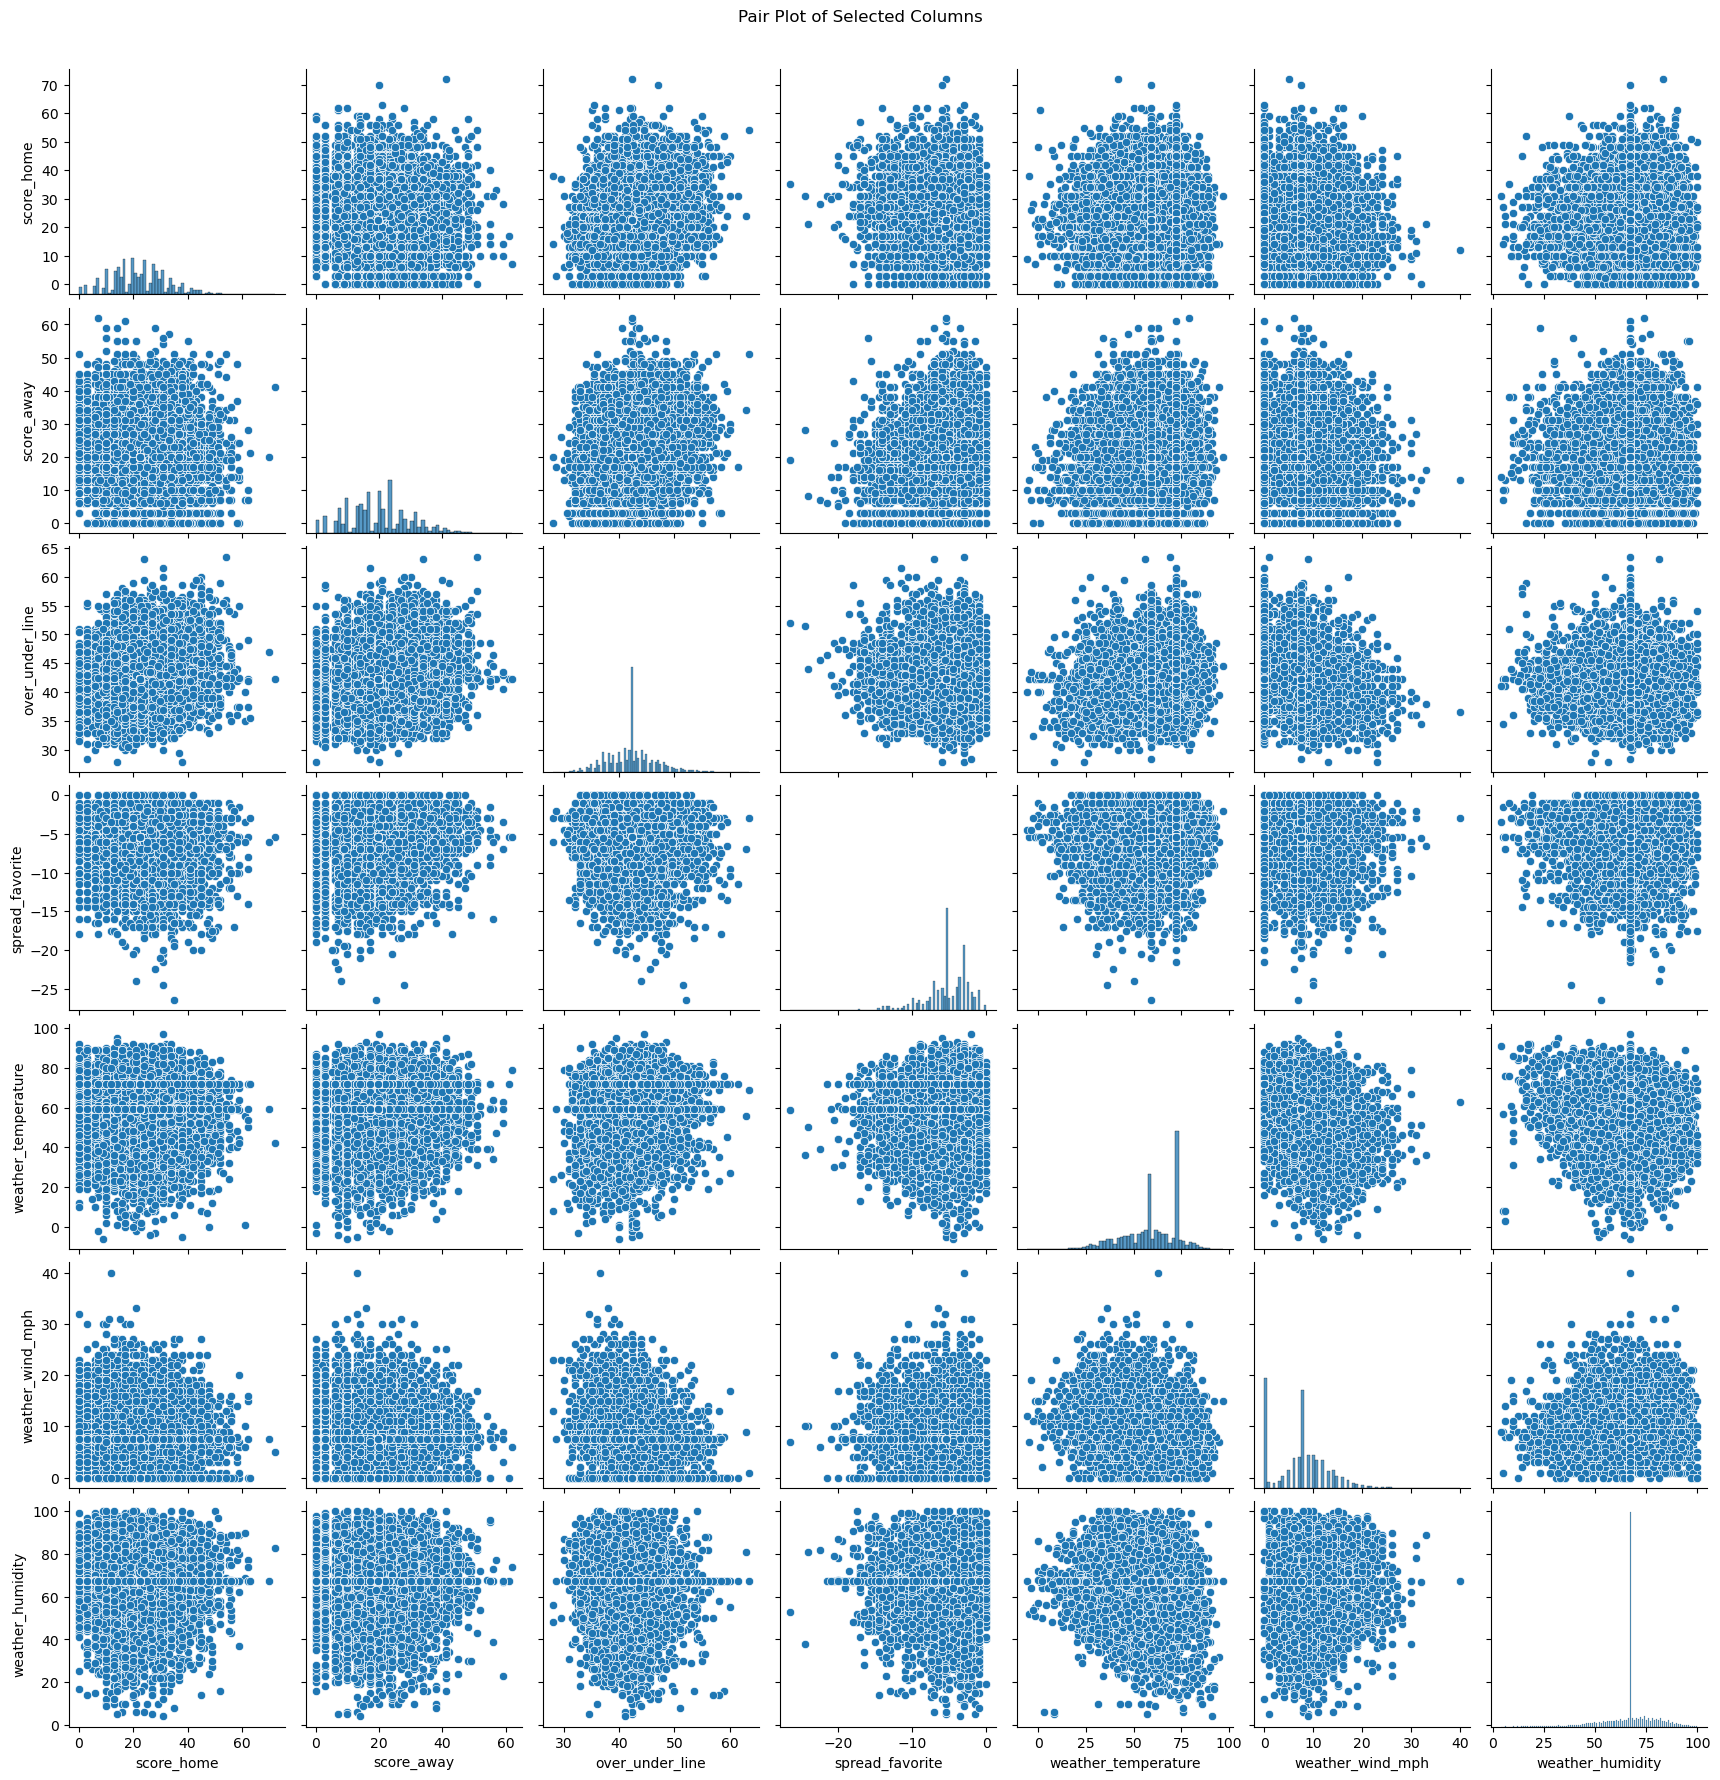

In [72]:
columns_to_plot = ['score_home', 'score_away', 'over_under_line', 'spread_favorite', 'weather_temperature', 'weather_wind_mph', 'weather_humidity']
plot_df = nfl[columns_to_plot]

sns.pairplot(plot_df)
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()


# Randon Forest Model

In [73]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import time

start_time = time.time()

## use the data to predict the future 271 games ##
nfl_train = nfl.iloc[:-271]  
nfl_predict = nfl.iloc[-271:]  

# onehot encoding
nfl_predict_encoded = pd.get_dummies(nfl_predict)
nfl_train_encoded = pd.get_dummies(nfl_train)

# Ensure both training and prediction data have the same columns
nfl_predict_encoded = nfl_predict_encoded.reindex(columns=nfl_train_encoded.columns, fill_value=0)

X_train = nfl_train_encoded.drop(columns=['score_home', 'score_away'])  
y_train_home = nfl_train_encoded['score_home']  
y_train_away = nfl_train_encoded['score_away']  

X_predict = nfl_predict_encoded.drop(columns=['score_home', 'score_away'])  

rf_model_home = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_away = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_home.fit(X_train, y_train_home)
rf_model_away.fit(X_train, y_train_away)
predicted_home_scores = rf_model_home.predict(X_predict)
predicted_away_scores = rf_model_away.predict(X_predict)
nfl_predict['predicted_score_home'] = predicted_home_scores
nfl_predict['predicted_score_away'] = predicted_away_scores

mse_home = mean_squared_error(nfl_predict['score_home'], predicted_home_scores)
mse_away = mean_squared_error(nfl_predict['score_away'], predicted_away_scores)

end_time = time.time()
runtime = end_time - start_time

print(nfl_predict[['predicted_score_home', 'predicted_score_away']])
print(f"Mean Squared Error (Home Scores): {mse_home}")
print(f"Mean Squared Error (Away Scores): {mse_away}")
print(f"Runtime: {runtime:.2f} seconds")


#######  OUTPUT  #######
#   predicted_score_home  predicted_score_away
#   13801                 17.57                 20.50
#   13802                 19.12                 18.85
#   13803                 19.31                 19.86
#   13804                 23.37                 18.59
#   13805                 21.11                 16.22
#   ...                     ...                   ...
#   14067                 23.76                 19.86
#   14068                 16.41                 21.15
#   14069                 21.40                 21.36
#   14070                 19.96                 18.44
#   14071                 21.88                 18.90
#   
#   
#   
#   [271 rows x 2 columns]
#   Mean Squared Error (Home Scores): 6.841222137206541
#   Mean Squared Error (Away Scores): 2.8940572362235955
#   Runtime: 60.65 seconds



       predicted_score_home  predicted_score_away
13801                 17.21                 21.13
13802                 19.17                 20.11
13803                 19.78                 19.20
13804                 23.18                 19.25
13805                 20.70                 16.90
...                     ...                   ...
14067                 23.60                 20.67
14068                 16.56                 21.72
14069                 22.45                 21.94
14070                 20.86                 18.59
14071                 23.28                 19.97

[271 rows x 2 columns]
Mean Squared Error (Home Scores): 6.199457795914624
Mean Squared Error (Away Scores): 3.2167314482639555
Runtime: 49.10 seconds


/var/folders/xc/yrj64zn13bjfv7vdfm67_kb40000gn/T/ipykernel_18551/2418405990.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfl_predict['predicted_score_home'] = predicted_home_scores
/var/folders/xc/yrj64zn13bjfv7vdfm67_kb40000gn/T/ipykernel_18551/2418405990.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nfl_predict['predicted_score_away'] = predicted_away_scores


## Predicted Scores

In [74]:
original_info = df.tail(271)[['schedule_date', 'team_home', 'team_away']].reset_index(drop=True)
result_df = pd.concat([original_info, nfl_predict[['predicted_score_home', 'predicted_score_away']].reset_index(drop=True)], axis=1)

result_df


schedule_date             team_home              team_away  \
0      2024-09-05    Kansas City Chiefs       Baltimore Ravens   
1      2024-09-08  Tampa Bay Buccaneers  Washington Commanders   
2      2024-09-08    Cincinnati Bengals   New England Patriots   
3      2024-09-08         Buffalo Bills      Arizona Cardinals   
4      2024-09-08  Los Angeles Chargers      Las Vegas Raiders   
..            ...                   ...                    ...   
266    2025-01-05    Indianapolis Colts   Jacksonville Jaguars   
267    2025-01-05         New York Jets         Miami Dolphins   
268    2025-01-05      Baltimore Ravens       Cleveland Browns   
269    2025-01-05     Green Bay Packers          Chicago Bears   
270    2025-01-05      Tennessee Titans         Houston Texans   

     predicted_score_home  predicted_score_away  
0                   17.21                 21.13  
1                   19.17                 20.11  
2                   19.78                 19.20  
3                   23.18                 19.25  
4                   20.70                 16.90  
..                    ...                   ...  
266                 23.60                 20.67  
267                 16.56                 21.72  
268                 22.45                 21.94  
269                 20.86                 18.59  
270                 23.28                 19.97  

[271 rows x 5 columns]

## Plot of Predicted Scores

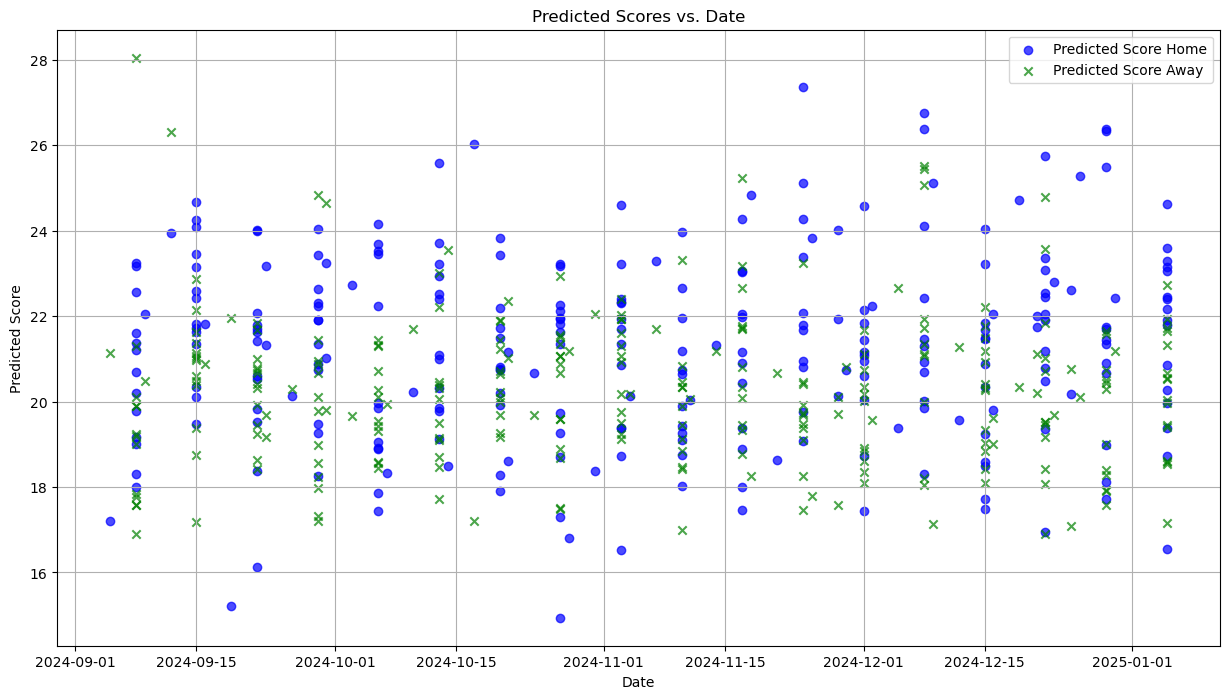

In [75]:

plt.figure(figsize=(15, 8))
plt.scatter(result_df['schedule_date'], result_df['predicted_score_home'], label='Predicted Score Home', color='blue', marker='o', alpha=0.7)
plt.scatter(result_df['schedule_date'], result_df['predicted_score_away'], label='Predicted Score Away', color='green', marker='x', alpha=0.7)

plt.title('Predicted Scores vs. Date')
plt.xlabel('Date')
plt.ylabel('Predicted Score')
plt.legend()
plt.grid(True)

plt.show()


## Residuals Distribution

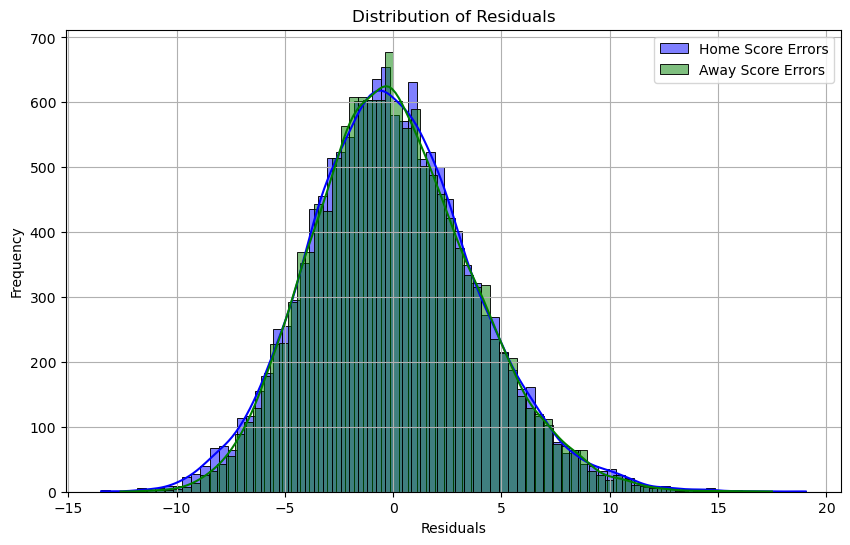

In [76]:
errors_home = y_train_home - rf_model_home.predict(X_train)
errors_away = y_train_away - rf_model_away.predict(X_train)

plt.figure(figsize=(10, 6))
sns.histplot(errors_home, color='blue', label='Home Score Errors', kde=True)
sns.histplot(errors_away, color='green', label='Away Score Errors', kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.legend()
plt.grid(True)
plt.show()


## Predicted vs Training Data

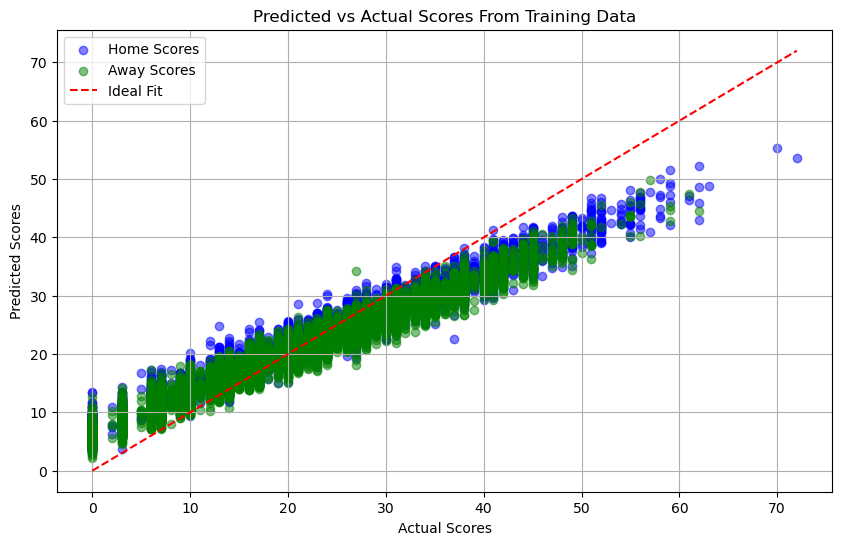

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(nfl_train['score_home'], rf_model_home.predict(X_train), alpha=0.5, color='blue', label='Home Scores')
plt.scatter(nfl_train['score_away'], rf_model_away.predict(X_train), alpha=0.5, color='green', label='Away Scores')
plt.plot([nfl_train['score_home'].min(), nfl_train['score_home'].max()], [nfl_train['score_home'].min(), nfl_train['score_home'].max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Predicted vs Actual Scores From Training Data')
plt.legend()
plt.grid(True)
plt.show()


for actual scores ~ between 15 and 30, the model is fairly accurate, when scores are higher, the model  under estimates, and when scores are lower the model over estimates.  

## Distribution of Scores

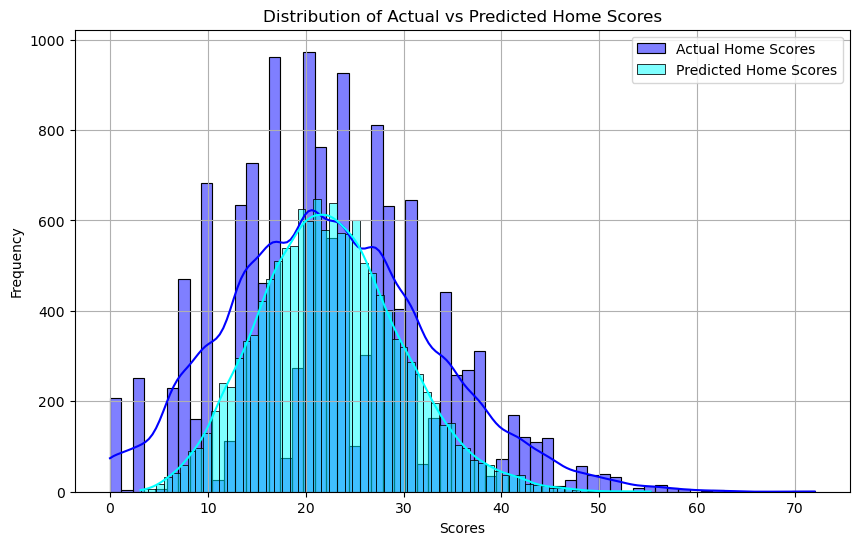

In [78]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(nfl_train['score_home'], color='blue', label='Actual Home Scores', kde=True)
sns.histplot(rf_model_home.predict(X_train), color='cyan', label='Predicted Home Scores', kde=True)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Home Scores')
plt.legend()
plt.grid(True)
plt.show()


the model seems to underestimate it frequently overestimates certain numbers which are not likely scores in foot ball.

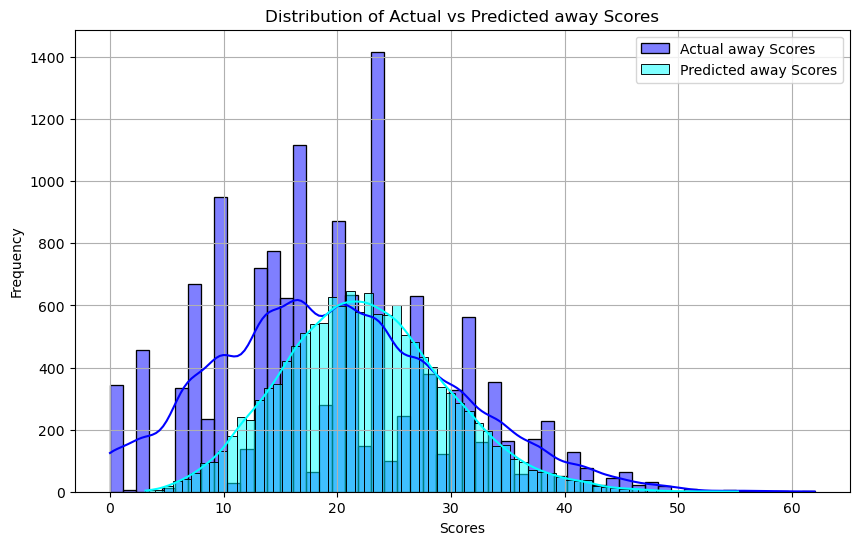

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(nfl_train['score_away'], color='blue', label='Actual away Scores', kde=True)
sns.histplot(rf_model_home.predict(X_train), color='cyan', label='Predicted away Scores', kde=True)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted away Scores')
plt.legend()
plt.grid(True)
plt.show()


# Conclusion

The model predicts the score of future Nfl games with reasonably low MSE. The the data set was large and some categories are very sparse. Some categories were incorrect data types. Data was cleaned and prepared for random forest regression. mse is displayed, which is relatively low, with the away score being considerably lower in mse. This analysis can be improved by implementing probabilities for certain final scores. for example, certain scores like 11, 17, and others are unlikely due to the way football is scored. I tried using weights to account for this but ended up with a higher mse. Click Below to download the csv of the scores

In [80]:
result_df.to_csv('nfl_scores', index="False")